In [ ]:



#                     ПІДСУМКОВА КОНТРОЛЬНА РОБОТА
#                         МАШИННЕ НАВЧАННЯ

#                           Завдання 2
#   Розробити за допомогою бібліотеки surprise рекомендаційну систему.




In [21]:

# Використати датасет movielens-100k
# Використайте алгоритми SVD, SVDpp
# Найкращі параметри для всіх алгоритмів підберіть за допомогою крос валідації.

from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise import SVD, SVDpp
import matplotlib.pyplot as plt

data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()

raw_data = data.raw_ratings
for i in range(5):  
    print(raw_data[i])

('196', '242', 3.0, '881250949')
('186', '302', 3.0, '891717742')
('22', '377', 1.0, '878887116')
('244', '51', 2.0, '880606923')
('166', '346', 1.0, '886397596')


In [22]:

# Обчисліть середнє значення середньоквадратичної помилки RMSE для 
# кожного алгоритму на основі результатів крос-валідації.

algorithms = [SVD(), SVDpp(), ]


rmse_scores = []
for algorithm in algorithms:
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_scores.append(results['test_rmse'].mean())

RMSE for <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x000002CD9B3DB4C0>: 0.9382606329800138
RMSE for <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x000002CD9B3DB220>: 0.9191639571765501
 

Найкращий алгоритм: <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x000002CD9B3DB220> з RMSE: 0.9191639571765501
 


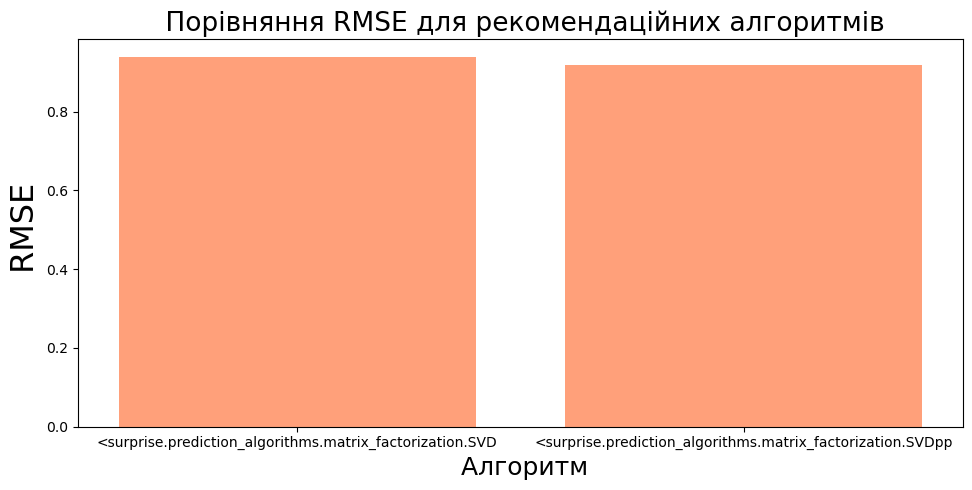

In [23]:

# Виберіть оптимальний алгоритм. Зробіть візуалізацію.

best_algorithm = algorithms[rmse_scores.index(min(rmse_scores))]


for i, algorithm in enumerate(algorithms):
    print(f'RMSE for {algorithm}: {rmse_scores[i]}')
print(" ")
print(f'\nНайкращий алгоритм: {best_algorithm} з RMSE: {min(rmse_scores)}')
print(" ")
plt.figure(figsize=(10, 5))
plt.bar([str(algorithm).split(' ')[0] for algorithm in algorithms], rmse_scores, color='lightsalmon')
plt.xlabel(' Алгоритм', fontsize=18)
plt.ylabel(' RMSE', fontsize=23)
plt.title(' Порівняння RMSE для рекомендаційних алгоритмів', fontsize=19)
plt.tight_layout()
plt.show()